In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,accuracy_score,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectFromModel
from scipy import stats
import statistics
from sklearn.utils import resample

In [2]:
train=pd.read_csv('bank-full.csv',sep=';')
test=pd.read_csv('bank.csv',sep=';')

In [3]:
df=train.append(test)

In [4]:
df.job.replace({'unknown':'student'},inplace=True)

In [5]:
for i in df.job.unique():
    mode = list(df[df['job']==i].education.mode())
    df['education'] = df.apply(lambda x: mode[0] if x.education == 'unknown' and x.job == i else x.education, axis=1)

In [6]:
df.drop(['poutcome','contact'],axis=1,inplace=True)
df['day']=df['day'].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   day        49732 non-null  object
 9   month      49732 non-null  object
 10  duration   49732 non-null  int64 
 11  campaign   49732 non-null  int64 
 12  pdays      49732 non-null  int64 
 13  previous   49732 non-null  int64 
 14  y          49732 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.1+ MB


In [8]:
df.skew()

age          0.686033
balance      8.204429
day          0.093154
duration     3.109530
campaign     4.884266
pdays        2.624838
previous    40.783648
dtype: float64

In [9]:
df1=df.copy()
pt=PowerTransformer(method='yeo-johnson')
for i in df.select_dtypes(np.number).columns:
    df1[i]=pt.fit_transform(df1[[i]])

In [10]:
ss=StandardScaler()
for i in df1.select_dtypes(np.number).columns:
    df1[i]=ss.fit_transform(df1[[i]])

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,student,single,secondary,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,no


In [12]:
df1

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,1.472673,management,married,tertiary,no,0.413470,yes,no,5,may,0.383602,-1.108763,-0.472220,-0.472194,no
1,0.427770,technician,single,secondary,no,-0.411915,yes,no,5,may,-0.224536,-1.108763,-0.472220,-0.472194,no
2,-0.712899,entrepreneur,married,secondary,no,-0.432287,yes,yes,5,may,-0.923914,-1.108763,-0.472220,-0.472194,no
3,0.681734,blue-collar,married,secondary,no,0.196492,yes,no,5,may,-0.736161,-1.108763,-0.472220,-0.472194,no
4,-0.712899,student,single,secondary,no,-0.433286,no,no,5,may,0.070806,-1.108763,-0.472220,-0.472194,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.712899,services,married,secondary,no,-1.291730,yes,no,30,jul,0.655145,1.322491,-0.472220,-0.472194,no
4517,1.408342,self-employed,married,tertiary,yes,-12.816819,yes,yes,9,may,-0.210453,-1.108763,-0.472220,-0.472194,no
4518,1.408342,technician,married,secondary,no,-0.273813,no,no,19,aug,-0.224536,1.883502,-0.472220,-0.472194,no
4519,-1.388333,blue-collar,married,secondary,no,0.064063,no,no,6,feb,-0.391055,1.090458,2.127955,2.167852,no


In [13]:
c=df1.select_dtypes(object)
n=df1.select_dtypes(np.number)

In [14]:
le=LabelEncoder()
for i in c.columns:
    c[i]=le.fit_transform(c[[i]])

In [15]:
df2=pd.concat([n,c],axis=1)

In [16]:
df2.y.value_counts()

0    43922
1     5810
Name: y, dtype: int64

In [17]:
n=df2[df2['y']==0]
y=df2[df2['y']==1]

In [18]:
y_re = resample(y,
             replace=True,
             n_samples=round((len(n)*30)/100),
             random_state=1)
n_re=resample(n,
             replace=True,
             n_samples=round((len(n)*70)/100),
             random_state=1)

In [19]:
df3=pd.concat([n_re,y_re])
df3.y.value_counts()

0    30745
1    13177
Name: y, dtype: int64

In [20]:
x=df3.drop('y',axis=1)
y=df3['y']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.3)

### Base model building

In [21]:
clfs={
    'Logreg':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Decision Tree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'Xgboost':XGBClassifier(),
    'GaussianNB':GaussianNB(),
    'KNN':KNeighborsClassifier()
}

models_report=pd.DataFrame(columns=['model name','accuracy', 'recall', 
                                    'precision', 'f1'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    ypred=clf.predict(xtest)
    print('Fitting the model ...', clf_name)
    t=pd.DataFrame({
        'model name':clf_name,
        'accuracy':accuracy_score(ytest, ypred), 
        'recall':recall_score(ytest, ypred), 
        'precision':precision_score(ytest, ypred), 
        'f1':f1_score(ytest, ypred)
    },index=[0])
    models_report=pd.concat([models_report,t], ignore_index=True)

models_report=models_report.sort_values(by='f1', ascending=False)
models_report

Fitting the model ... Logreg
Fitting the model ... Naive Bayes
Fitting the model ... Decision Tree
Fitting the model ... RandomForest
Fitting the model ... GradientBoost
Fitting the model ... Xgboost
Fitting the model ... GaussianNB
Fitting the model ... KNN


,model name,accuracy,recall,precision,f1
3,RandomForest,0.944449,0.929595,0.888209,0.908431
2,Decision Tree,0.927601,0.918587,0.849432,0.882657
5,Xgboost,0.910754,0.868408,0.836704,0.852261
7,KNN,0.860135,0.763953,0.764149,0.764051
4,GradientBoost,0.844502,0.716590,0.748196,0.732052
0,Logreg,0.809289,0.602919,0.709979,0.652084
1,Naive Bayes,0.774228,0.648490,0.612576,0.630021
6,GaussianNB,0.774228,0.648490,0.612576,0.630021


Random Forest performs better

In [22]:
def update_performance(name,test,pred):
    
    global models_report


    
    models_report = models_report.append({'model name'       : name,
                                    'accuracy'    : accuracy_score(test,pred),
                                    'recall'      : recall_score(test,pred),
                                    'precision'   : precision_score(test,pred),
                                    'f1'    : f1_score(test,pred)
                                   },
                                   ignore_index=True)
    models_report=models_report.sort_values(by='f1', ascending=False)
    return models_report

In [23]:
rf1=RandomForestClassifier(random_state=1)
rf1.fit(xtrain,ytrain)
ypred_rf1=rf1.predict(xtest)
print('Train',f1_score(ytrain,rf1.predict(xtrain)))
print('Test',f1_score(ytest,ypred_rf1))

Train 1.0
Test 0.9115509897268855


In [24]:
update_performance('Random Forest rs1',ytest,ypred_rf1)

,model name,accuracy,recall,precision,f1
8,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
0,RandomForest,0.944449,0.929595,0.888209,0.908431
1,Decision Tree,0.927601,0.918587,0.849432,0.882657
2,Xgboost,0.910754,0.868408,0.836704,0.852261
3,KNN,0.860135,0.763953,0.764149,0.764051
4,GradientBoost,0.844502,0.716590,0.748196,0.732052
5,Logreg,0.809289,0.602919,0.709979,0.652084
6,Naive Bayes,0.774228,0.648490,0.612576,0.630021
7,GaussianNB,0.774228,0.648490,0.612576,0.630021


In [32]:
rf=RandomForestClassifier()
sfs_for=SFS(estimator=rf,k_features='best',scoring='f1')
sfs_for.fit(xtrain,ytrain)
sfs_for.k_feature_names_

('age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'marital',
 'education',
 'housing',
 'day',
 'month')

In [35]:
xtrain_1=xtrain[list(sfs_for.k_feature_names_)]
xtest_1=xtest[list(sfs_for.k_feature_names_)]

In [36]:
rf2=RandomForestClassifier(random_state=1)
rf2.fit(xtrain_1,ytrain)
ypred_rf2=rf2.predict(xtest_1)
print('Train',f1_score(ytrain,rf2.predict(xtrain_1)))
print('Test',f1_score(ytest,ypred_rf2))

Train 1.0
Test 0.9098411904464174


In [37]:
update_performance('Random Forest sfs forward',ytest,ypred_rf2)

,model name,accuracy,recall,precision,f1
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
9,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
1,RandomForest,0.945132,0.931388,0.888835,0.909614
2,Decision Tree,0.927829,0.922171,0.847729,0.883384
3,Xgboost,0.910754,0.868408,0.836704,0.852261
4,KNN,0.860135,0.763953,0.764149,0.764051
5,GradientBoost,0.844502,0.716590,0.748196,0.732052
6,Logreg,0.809289,0.602919,0.709979,0.652084
7,Naive Bayes,0.774228,0.648490,0.612576,0.630021
8,GaussianNB,0.774228,0.648490,0.612576,0.630021


In [39]:
rf=RandomForestClassifier()
sfs_ba=SFS(estimator=rf,k_features='best',scoring='f1',forward=False)
sfs_ba.fit(xtrain,ytrain)
sfs_ba.k_feature_names_

('age', 'duration', 'campaign', 'pdays', 'marital', 'housing', 'day', 'month')

In [40]:
xtrain_2=xtrain[list(sfs_ba.k_feature_names_)]
xtest_2=xtest[list(sfs_ba.k_feature_names_)]

In [41]:
rf3=RandomForestClassifier(random_state=1)
rf3.fit(xtrain_2,ytrain)
ypred_rf3=rf3.predict(xtest_2)
print('Train',f1_score(ytrain,rf3.predict(xtrain_2)))
print('Test',f1_score(ytest,ypred_rf3))

Train 1.0
Test 0.9092044461096541


In [42]:
update_performance('Random Forest sfs backward',ytest,ypred_rf3)

,model name,accuracy,recall,precision,f1
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
1,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
2,RandomForest,0.945132,0.931388,0.888835,0.909614
10,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
3,Decision Tree,0.927829,0.922171,0.847729,0.883384
4,Xgboost,0.910754,0.868408,0.836704,0.852261
5,KNN,0.860135,0.763953,0.764149,0.764051
6,GradientBoost,0.844502,0.716590,0.748196,0.732052
7,Logreg,0.809289,0.602919,0.709979,0.652084
8,Naive Bayes,0.774228,0.648490,0.612576,0.630021


In [44]:
n=df3.iloc[:,0:6]
pval=[]
f=[]
for i in n.columns:
    s,p=stats.ttest_ind(df3[df3['y']==0][i],df3[df3['y']==1][i])
    f.append(i)
    pval.append(p)
pvalue1=pd.DataFrame({'Feature':f,'Pvalue':pval})
pvalue1[pvalue1['Pvalue']<0.05]

,Feature,Pvalue
1,balance,1.075594e-84
2,duration,0.000000e+00
3,campaign,1.574868e-144
4,pdays,0.000000e+00
5,previous,0.000000e+00


In [48]:
c=df3.iloc[:,6:64].drop('y',axis=1)
pval=[]
f=[]
for i in c.columns:
    s,p,d,e=stats.chi2_contingency(pd.crosstab(df3[i],df3['y']))
    f.append(i)
    pval.append(p)
pvalue2=pd.DataFrame({'Feature':f,'Pvalue':pval})
pvalue2[pvalue2['Pvalue']<0.05].sort_values(by='Pvalue',ascending=True)

,Feature,Pvalue
4,housing,0.000000e+00
7,month,0.000000e+00
0,job,2.011489e-299
6,day,3.576293e-217
5,loan,9.964790e-113
2,education,1.820396e-87
1,marital,1.161135e-84
3,default,1.890111e-09


In [50]:
xtrain_3=xtrain.drop('age',axis=1)
xtest_3=xtest.drop('age',axis=1)

In [51]:
rf4=RandomForestClassifier(random_state=1)
rf4.fit(xtrain_3,ytrain)
ypred_rf4=rf4.predict(xtest_3)
print('Train',f1_score(ytrain,rf4.predict(xtrain_3)))
print('Test',f1_score(ytest,ypred_rf4))

Train 1.0
Test 0.9074328544659588


In [52]:
update_performance('Random Forest with age removed',ytest,ypred_rf4)

,model name,accuracy,recall,precision,f1
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
1,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
2,RandomForest,0.945132,0.931388,0.888835,0.909614
3,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
11,Random Forest with age removed,0.943766,0.929852,0.886070,0.907433
4,Decision Tree,0.927829,0.922171,0.847729,0.883384
5,Xgboost,0.910754,0.868408,0.836704,0.852261
6,KNN,0.860135,0.763953,0.764149,0.764051
7,GradientBoost,0.844502,0.716590,0.748196,0.732052
8,Logreg,0.809289,0.602919,0.709979,0.652084


In [53]:
from sklearn.feature_selection import mutual_info_classif

<AxesSubplot:>

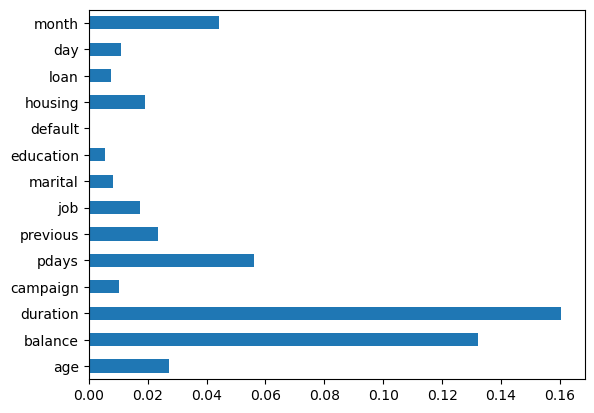

In [54]:
imp=mutual_info_classif(xtrain,ytrain)
feat_imp=pd.Series(imp,df3.columns[0:len(df3.columns)-1])
feat_imp.plot(kind='barh')

In [55]:
list(feat_imp[feat_imp>0].index)

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'day',
 'month']

In [56]:
xtrain_4=xtrain[list(feat_imp[feat_imp>0].index)]
xtest_4=xtest[list(feat_imp[feat_imp>0].index)]
rf5=RandomForestClassifier(random_state=1)
rf5.fit(xtrain_4,ytrain)
ypred_rf5=rf5.predict(xtest_4)
print('Train',f1_score(ytrain,rf5.predict(xtrain_4)))
print('Test',f1_score(ytest,ypred_rf5))

Train 1.0
Test 0.9099975068561456


In [57]:
update_performance('Random Forest info gain feat selection',ytest,ypred_rf5)

,model name,accuracy,recall,precision,f1
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
12,Random Forest info gain feat selection,0.945208,0.934460,0.886783,0.909998
1,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
2,RandomForest,0.945132,0.931388,0.888835,0.909614
3,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
4,Random Forest with age removed,0.943766,0.929852,0.886070,0.907433
5,Decision Tree,0.927829,0.922171,0.847729,0.883384
6,Xgboost,0.910754,0.868408,0.836704,0.852261
7,KNN,0.860135,0.763953,0.764149,0.764051
8,GradientBoost,0.844502,0.716590,0.748196,0.732052


<AxesSubplot:>

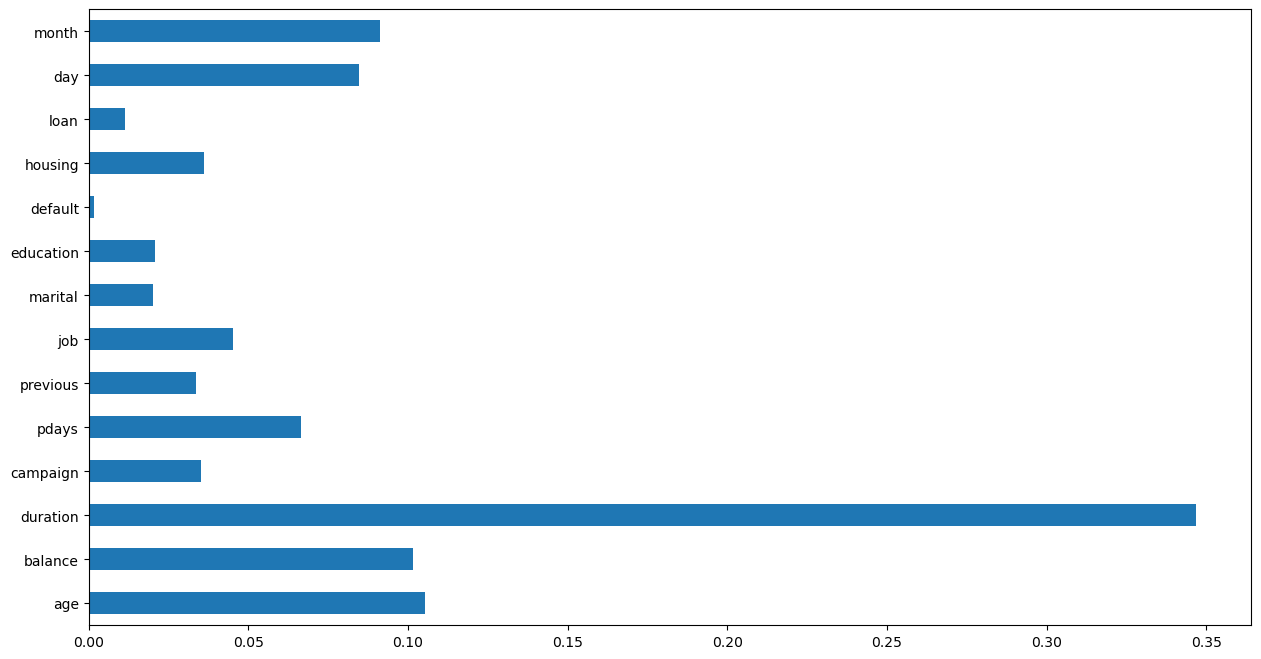

In [58]:
rf_imp=rf1.feature_importances_
rf_feat_imp=pd.Series(rf_imp,df3.columns[0:len(df3.columns)-1])
plt.figure(figsize=(15,8))
rf_feat_imp.plot(kind='barh')

In [59]:
len(df3.columns)

15

In [66]:
rf_feat_imp.sort_values(ascending=False)

duration     0.346685
age          0.105239
balance      0.101636
month        0.091277
day          0.084622
pdays        0.066328
job          0.045123
housing      0.036061
campaign     0.035196
previous     0.033483
education    0.020862
marital      0.020258
loan         0.011503
default      0.001729
dtype: float64

In [63]:
xtrain_5=xtrain[list(rf_feat_imp.sort_values(ascending=False)[rf_feat_imp>0.03].index)]
xtest_5=xtest[list(rf_feat_imp.sort_values(ascending=False)[rf_feat_imp>0.03].index)]

In [64]:
rf6=RandomForestClassifier(random_state=1)
rf6.fit(xtrain_5,ytrain)
ypred_rf6=rf6.predict(xtest_5)
print('Train',f1_score(ytrain,rf6.predict(xtrain_5)))
print('Test',f1_score(ytest,ypred_rf6))

Train 1.0
Test 0.908227056764191


In [65]:
update_performance('Random Forest rf importances 1',ytest,ypred_rf6)

,model name,accuracy,recall,precision,f1
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
1,Random Forest info gain feat selection,0.945208,0.934460,0.886783,0.909998
2,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
3,RandomForest,0.945132,0.931388,0.888835,0.909614
4,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
13,Random Forest rf importances 1,0.944297,0.929852,0.887586,0.908227
5,Random Forest with age removed,0.943766,0.929852,0.886070,0.907433
6,Decision Tree,0.927829,0.922171,0.847729,0.883384
7,Xgboost,0.910754,0.868408,0.836704,0.852261
8,KNN,0.860135,0.763953,0.764149,0.764051


In [79]:
ypred_prob_rf1=[0 if x<0.6 else 1 for x in rf1.predict_proba(xtest)[:,1]]
print('Train',f1_score(ytrain,rf1.predict(xtrain)))
print('Test',f1_score(ytest,ypred_prob_rf1))

Train 1.0
Test 0.9124078147237676


In [80]:
update_performance('Random Forest rs 1 threshold 0.6',ytest,ypred_prob_rf1)

,model name,accuracy,recall,precision,f1
14,Random Forest rs 1 threshold 0.6,0.948623,0.902714,0.922312,0.912408
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
1,Random Forest info gain feat selection,0.945208,0.934460,0.886783,0.909998
2,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
3,RandomForest,0.945132,0.931388,0.888835,0.909614
4,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
5,Random Forest rf importances 1,0.944297,0.929852,0.887586,0.908227
6,Random Forest with age removed,0.943766,0.929852,0.886070,0.907433
7,Decision Tree,0.927829,0.922171,0.847729,0.883384
8,Xgboost,0.910754,0.868408,0.836704,0.852261


In [169]:
rf7=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9)
rf7.fit(xtrain,ytrain)
ypred_rf7=rf7.predict(xtest)
print('Train',f1_score(ytrain,rf7.predict(xtrain)))
print('Test',f1_score(ytest,ypred_rf7))

Train 0.8624229979466118
Test 0.8051684823916899


In [170]:
rf8=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3)
rf8.fit(xtrain,ytrain)
ypred_rf8=rf8.predict(xtest)
print('Train',f1_score(ytrain,rf8.predict(xtrain)))
print('Test',f1_score(ytest,ypred_rf8))

Train 0.9991364421416236
Test 0.9107321965897693


In [121]:
ada=AdaBoostClassifier(RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9),random_state=1)
ada.fit(xtrain,ytrain)
ypred_ada=ada.predict(xtest)
print('Train',f1_score(ytrain,ada.predict(xtrain)))
print('Test',f1_score(ytest,ypred_ada))

Train 1.0
Test 0.9121827411167512


In [122]:
ada=AdaBoostClassifier(RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3),random_state=1)
ada.fit(xtrain,ytrain)
ypred_ada=ada.predict(xtest)
print('Train',f1_score(ytrain,ada.predict(xtrain)))
print('Test',f1_score(ytest,ypred_ada))

Train 1.0
Test 0.9108384975338308


In [124]:
rf9=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9)
rf9.fit(xtrain_1,ytrain)
ypred_rf9=rf9.predict(xtest_1)
print('Train',f1_score(ytrain,rf9.predict(xtrain_1)))
print('Test',f1_score(ytest,ypred_rf9))

Train 0.8691009114934469
Test 0.8132843199391557


In [125]:
rf10=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9)
rf10.fit(xtrain_2,ytrain)
ypred_rf10=rf10.predict(xtest_2)
print('Train',f1_score(ytrain,rf10.predict(xtrain_2)))
print('Test',f1_score(ytest,ypred_rf10))

Train 0.8372949266338189
Test 0.7907393195190586


In [126]:
rf11=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9)
rf11.fit(xtrain_3,ytrain)
ypred_rf11=rf11.predict(xtest_3)
print('Train',f1_score(ytrain,rf11.predict(xtrain_3)))
print('Test',f1_score(ytest,ypred_rf11))

Train 0.8526223584802365
Test 0.7921507875032274


In [127]:
rf12=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9)
rf12.fit(xtrain_4,ytrain)
ypred_rf12=rf12.predict(xtest_4)
print('Train',f1_score(ytrain,rf12.predict(xtrain_4)))
print('Test',f1_score(ytest,ypred_rf12))

Train 0.8654793482379689
Test 0.8067184120117064


In [128]:
rf13=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9)
rf13.fit(xtrain_5,ytrain)
ypred_rf13=rf13.predict(xtest_5)
print('Train',f1_score(ytrain,rf13.predict(xtrain_5)))
print('Test',f1_score(ytest,ypred_rf13))

Train 0.8738249986571414
Test 0.812649615723825


In [129]:
rf14=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3)
rf14.fit(xtrain_1,ytrain)
ypred_rf14=rf14.predict(xtest_1)
print('Train',f1_score(ytrain,rf14.predict(xtrain_1)))
print('Test',f1_score(ytest,ypred_rf14))

Train 0.9993524714008202
Test 0.906563126252505


In [130]:
rf15=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3)
rf15.fit(xtrain_2,ytrain)
ypred_rf15=rf15.predict(xtest_2)
print('Train',f1_score(ytrain,rf15.predict(xtrain_2)))
print('Test',f1_score(ytest,ypred_rf15))

Train 0.9982180463307955
Test 0.907409721354492


In [131]:
rf16=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3)
rf16.fit(xtrain_3,ytrain)
ypred_rf16=rf16.predict(xtest_3)
print('Train',f1_score(ytrain,rf16.predict(xtrain_3)))
print('Test',f1_score(ytest,ypred_rf16))

Train 0.9985959606868993
Test 0.9050181454135903


In [132]:
rf17=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3)
rf17.fit(xtrain_4,ytrain)
ypred_rf17=rf17.predict(xtest_4)
print('Train',f1_score(ytrain,rf17.predict(xtrain_4)))
print('Test',f1_score(ytest,ypred_rf17))

Train 0.9990824202515248
Test 0.9086135766970872


In [133]:
rf18=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3)
rf18.fit(xtrain_5,ytrain)
ypred_rf18=rf18.predict(xtest_5)
print('Train',f1_score(ytrain,rf18.predict(xtrain_5)))
print('Test',f1_score(ytest,ypred_rf18))

Train 0.9991905455722843
Test 0.9087276813584717


In [154]:
rf19=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9,class_weight={0:1,1:4})
rf19.fit(xtrain,ytrain)
ypred_rf19=rf19.predict(xtest)
print('Train',f1_score(ytrain,rf19.predict(xtrain)))
print('Test',f1_score(ytest,ypred_rf19))

Train 0.8356471935853379
Test 0.8015873015873017


In [167]:
rf20=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,class_weight={0:1,1:4})
rf20.fit(xtrain,ytrain)
ypred_rf20=rf20.predict(xtest)
print('Train',f1_score(ytrain,rf20.predict(xtrain)))
print('Test',f1_score(ytest,ypred_rf20))

Train 0.9994607420189819
Test 0.9082718057815041


In [171]:
print(roc_auc_score(ytest,ypred_rf7))

0.8631254279251329


In [172]:
print(roc_auc_score(ytest,ypred_rf8))

0.9413037080042413


In [173]:
print(roc_auc_score(ytest,ypred_rf19))

0.8877075711316024


In [174]:
print(roc_auc_score(ytest,ypred_rf20))

0.9399489143618426


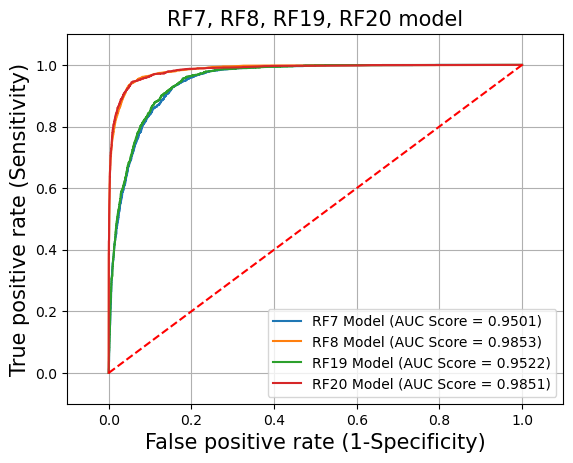

In [175]:
# rf7
#################
y_pred_prob_rf7=rf7.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob_rf7)
auc_score_rf7=roc_auc_score(ytest,y_pred_prob_rf7)
plt.plot(fpr,tpr,label='RF7 Model (AUC Score = %0.4f)'%auc_score_rf7)

#################
# rf8
y_pred_prob_rf8=rf8.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob_rf8)
auc_score_rf8=roc_auc_score(ytest,y_pred_prob_rf8)
plt.plot(fpr,tpr,label='RF8 Model (AUC Score = %0.4f)'%auc_score_rf8)

#################
# rf19
y_pred_prob_rf19=rf19.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob_rf19)
auc_score_rf19=roc_auc_score(ytest,y_pred_prob_rf19)
plt.plot(fpr,tpr,label='RF19 Model (AUC Score = %0.4f)'%auc_score_rf19)

###############
# rf20
y_pred_prob_rf20=rf20.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob_rf20)
auc_score_rf20=roc_auc_score(ytest,y_pred_prob_rf20)
plt.plot(fpr,tpr,label='RF20 Model (AUC Score = %0.4f)'%auc_score_rf20)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.plot([0, 1], [0, 1],'r--')

plt.title('RF7, RF8, RF19, RF20 model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.legend(loc = 'lower right')
plt.grid(True)

In [176]:
df3

,age,balance,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,day,month,y
35390,1.207109,1.641432,-0.148974,-1.108763,-0.472220,-0.472194,1,1,0,0,1,0,6,8,0
12637,-0.362241,-0.111324,-0.814563,0.736410,-0.472220,-0.472194,4,2,2,0,0,1,3,5,0
5358,0.152738,-0.420935,-0.704114,-1.108763,-0.472220,-0.472194,4,2,2,0,0,0,22,8,0
34863,-0.967873,-0.227403,0.669558,-1.108763,-0.472220,-0.472194,3,2,2,0,1,0,5,8,0
4299,-0.252836,-0.434374,0.007575,0.133431,-0.472220,-0.472194,7,1,1,0,1,1,30,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064,-0.712899,0.827207,-0.275121,-1.108763,2.096526,2.173176,7,1,1,0,1,0,20,10,1
30548,-0.838079,-0.434374,1.289596,1.090458,-0.472220,-0.472194,4,2,2,0,0,0,4,3,1
28977,0.681734,-0.377636,2.201148,-1.108763,-0.472220,-0.472194,4,2,2,0,0,0,1,3,1
38955,-1.540168,-0.178753,0.732622,-1.108763,-0.472220,-0.472194,1,2,1,0,1,1,17,8,1


In [181]:
df['bal_type']=df['balance'].apply(lambda x: 'Negative' if x<0 else 'Positive')

<AxesSubplot:xlabel='bal_type', ylabel='count'>

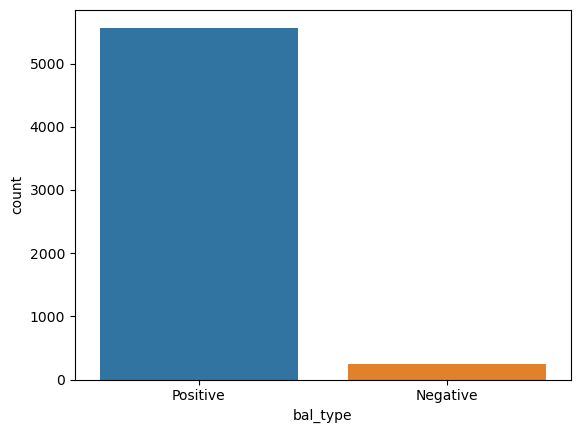

In [182]:
y=df[df['y']=='yes']
sns.countplot(y['bal_type'])

In [183]:
rf8.feature_importances_

array([0.10241378, 0.10030324, 0.35015892, 0.03534512, 0.06853066,
       0.03198024, 0.04353539, 0.02055079, 0.0203395 , 0.00171203,
       0.03713223, 0.01211941, 0.0837596 , 0.0921191 ])

In [184]:
rfe=RFE(estimator=rf,n_features_to_select=0.75)
rfe.fit(xtrain,ytrain)
rfe1=pd.DataFrame({'columns':rfe.feature_names_in_,
                  'rank':rfe.ranking_})
rfe1[rfe1['rank']==1][['columns']].values.tolist()
l=[]

for i in rfe1[rfe1['rank']==1][['columns']].values:
    l.extend(list(i))
l

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job',
 'housing',
 'day',
 'month']

In [185]:
xtrain_new1=xtrain[l]
xtest_new1=xtest[l]

In [186]:
rfe1=RandomForestClassifier(random_state=1)
rfe1.fit(xtrain_new1,ytrain)
ypred_rfe1=rfe1.predict(xtest_new1)
print('Train',f1_score(ytrain,rfe1.predict(xtrain_new1)))
print('Test',f1_score(ytest,ypred_rfe1))

Train 1.0
Test 0.9108812165025552


In [187]:
models_report

,model name,accuracy,recall,precision,f1
14,Random Forest rs 1 threshold 0.6,0.948623,0.902714,0.922312,0.912408
0,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
1,Random Forest info gain feat selection,0.945208,0.934460,0.886783,0.909998
2,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
3,RandomForest,0.945132,0.931388,0.888835,0.909614
4,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
5,Random Forest rf importances 1,0.944297,0.929852,0.887586,0.908227
6,Random Forest with age removed,0.943766,0.929852,0.886070,0.907433
7,Decision Tree,0.927829,0.922171,0.847729,0.883384
8,Xgboost,0.910754,0.868408,0.836704,0.852261


In [189]:
update_performance('Random Forest rfe 0.75',ytest,ypred_rfe1)

,model name,accuracy,recall,precision,f1
0,Random Forest rs 1 threshold 0.6,0.948623,0.902714,0.922312,0.912408
1,Random Forest rs1,0.946422,0.931388,0.892542,0.911551
15,Random Forest rfe 0.75,0.945739,0.935484,0.887539,0.910881
2,Random Forest info gain feat selection,0.945208,0.934460,0.886783,0.909998
3,Random Forest sfs forward,0.945283,0.931388,0.889269,0.909841
4,RandomForest,0.945132,0.931388,0.888835,0.909614
5,Random Forest sfs backward,0.944828,0.931900,0.887588,0.909204
6,Random Forest rf importances 1,0.944297,0.929852,0.887586,0.908227
7,Random Forest with age removed,0.943766,0.929852,0.886070,0.907433
8,Decision Tree,0.927829,0.922171,0.847729,0.883384


In [196]:
rfe=RFE(estimator=rf,n_features_to_select=0.50)
rfe.fit(xtrain,ytrain)
rfe1=pd.DataFrame({'columns':rfe.feature_names_in_,
                  'rank':rfe.ranking_})
rfe1[rfe1['rank']==1][['columns']].values.tolist()
l=[]

for i in rfe1[rfe1['rank']==1][['columns']].values:
    l.extend(list(i))
l

['age', 'balance', 'duration', 'pdays', 'job', 'day', 'month']

In [197]:
xtrain_new1=xtrain[l]
xtest_new1=xtest[l]

In [198]:
rfe1=RandomForestClassifier(random_state=1)
rfe1.fit(xtrain_new1,ytrain)
ypred_rfe1=rfe1.predict(xtest_new1)
print('Train',f1_score(ytrain,rfe1.predict(xtrain_new1)))
print('Test',f1_score(ytest,ypred_rfe1))

Train 0.9999460654765115
Test 0.9084295032614149


## Final model

### Model Evaluation and Feature Importance for rf19

In [26]:
print(classification_report(ytest,ypred_rf19))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      9271
           1       0.69      0.96      0.80      3906

    accuracy                           0.86     13177
   macro avg       0.83      0.89      0.85     13177
weighted avg       0.89      0.86      0.86     13177



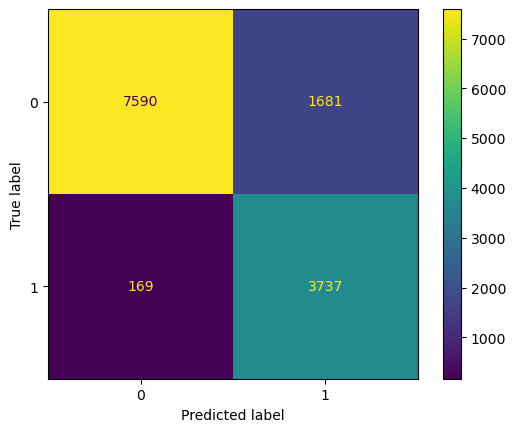

In [27]:
ConfusionMatrixDisplay.from_predictions(ytest,ypred_rf19)

In [28]:
rf_imp_19=rf19.feature_importances_
rf_feat_imp_19=pd.Series(rf_imp_19,df3.columns[0:len(df3.columns)-1])

In [29]:
rf_feat_imp_19

age          0.069516
balance      0.065291
duration     0.486157
campaign     0.027027
pdays        0.062670
previous     0.030039
job          0.027562
marital      0.014607
education    0.014179
default      0.000600
housing      0.057519
loan         0.011833
day          0.054532
month        0.078470
dtype: float64

In [25]:
rf19=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=3,min_samples_leaf=9,class_weight={0:1,1:4})
rf19.fit(xtrain,ytrain)
ypred_rf19=rf19.predict(xtest)
print('Train',f1_score(ytrain,rf19.predict(xtrain)))
print('Test',f1_score(ytest,ypred_rf19))

Train 0.8356471935853379
Test 0.8015873015873017


In [34]:
metrics.log_loss(ytest,ypred_rf19)

4.849213057134776

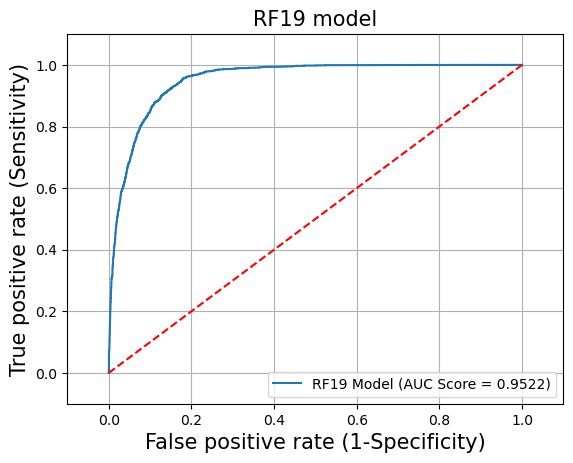

In [35]:
y_pred_prob_rf19=rf19.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob_rf19)
auc_score_rf19=roc_auc_score(ytest,y_pred_prob_rf19)
plt.plot(fpr,tpr,label='RF19 Model (AUC Score = %0.4f)'%auc_score_rf19)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.plot([0, 1], [0, 1],'r--')

plt.title('RF19 model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.legend(loc = 'lower right')
plt.grid(True)

<AxesSubplot:>

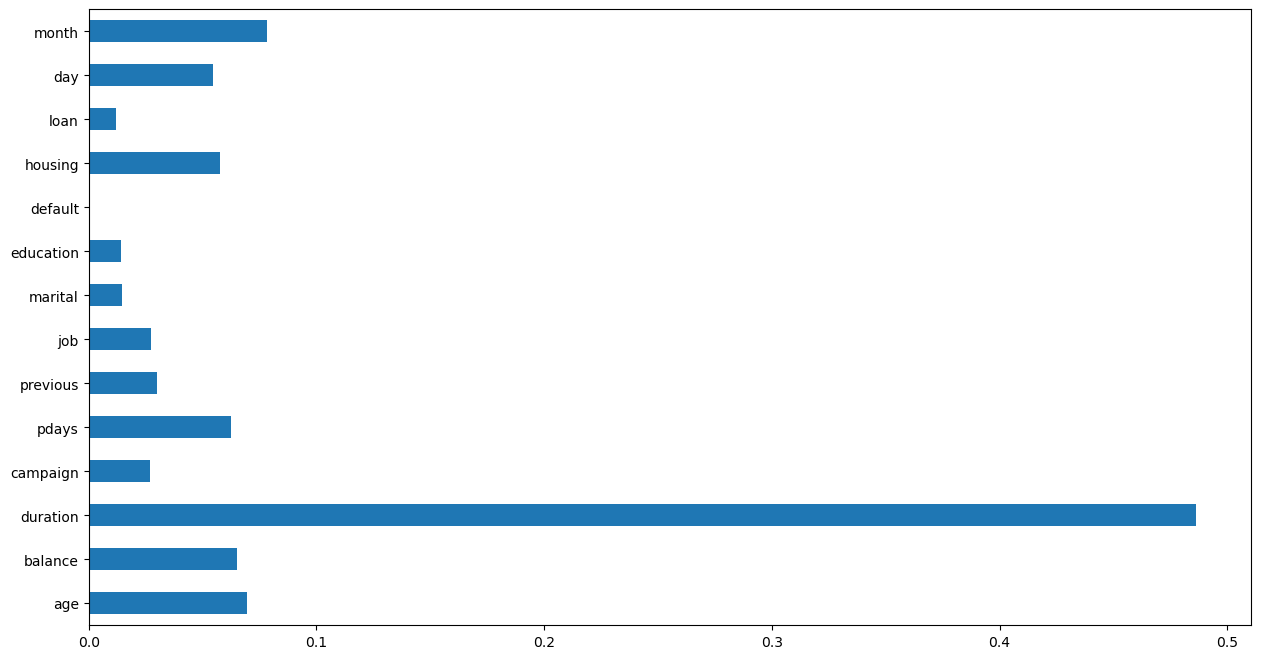

In [36]:
plt.figure(figsize=(15,8))
rf_feat_imp_19.plot(kind='barh')

The F1 score is a metric that combines precision and recall. For  training set, we got the F1 score is approximately 0.836, while for the test set, it is about 0.802. This suggests that the model performs well on both the training and test data, indicating a good balance between precision and recall. The F1 scores on both the training and test sets are relatively high, indicating that the model effectively captures both false positives and false negatives. This suggests a well-generalized model that is not overfitting to the training data. The RandomForestClassifier is configured with specific hyperparameters, such as n_estimators=50, min_samples_split=3, min_samples_leaf=9, and class_weight={0: 1, 1: 4}. These settings imply the use of 50 decision trees in the forest, a minimum of 3 samples required to split an internal node, a minimum of 9 samples required to be a leaf node, and a class weight adjustment to handle class imbalance. A score of 0.9522 is close to the maximum value of 1.0, indicating excellent discrimination ability of the  model. This means that the model is very effective at distinguishing between the positive and negative classes. Duration has the highest importance score (0.486), suggesting it is the most influential feature in making predictions.
month (0.078), age (0.069), and balance (0.065) also have notable importance.
The F1-score combines precision and recall into a single metric. An F1-score of 0.80 suggests a good balance between precision and recall for class 1